In [1]:
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import shelve

In [2]:
df = pd.read_csv("my_train_thin_thin.csv")
y = df["is_churn"]
df.drop(["is_churn","msno"],axis=1,inplace=True)

In [4]:
df["col_diff_last"] = df["date_count_201702"]-df["date_count_201701"]
df["col_diff_second_last"] = df["date_count_201701"]-df["date_count_201612"]
df["date_diff"] = 20170301-df["max_membership_expire_date"]

In [5]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
clf = RandomForestClassifier(random_state = 47,verbose=True)
clf.fit(df,y)

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=47, verbose=True,
            warm_start=False)

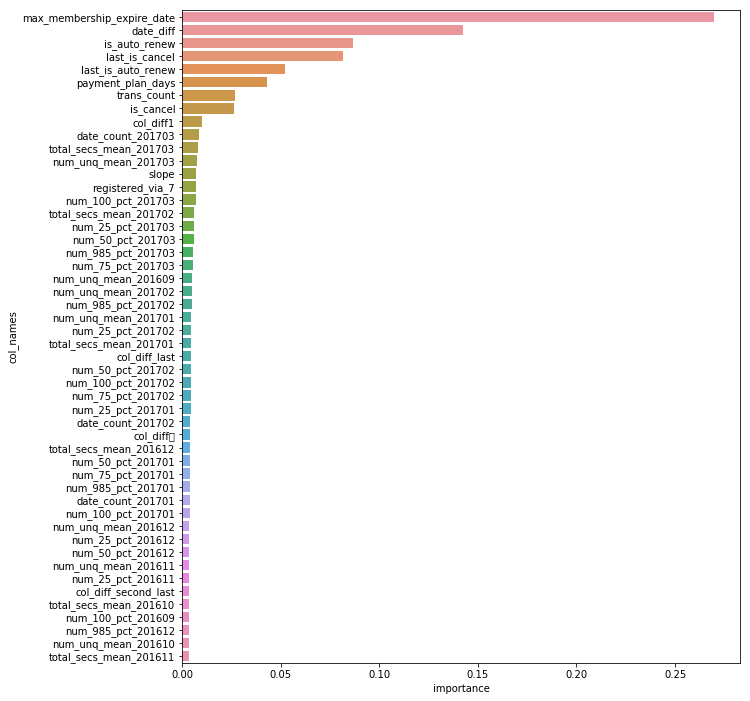

In [6]:
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.columns.tolist(), columns=["importance"])
importance = importance.sort_values('importance', ascending = False)
importance['col_names'] = importance.index

plt.figure(figsize=(10, 12))
sns.barplot(data = importance.iloc[:50,:], y = 'col_names', x = 'importance')

In [8]:
importance.iloc[:50,1].index.tolist()

['max_membership_expire_date',
 'date_diff',
 'is_auto_renew',
 'last_is_cancel',
 'last_is_auto_renew',
 'payment_plan_days',
 'trans_count',
 'is_cancel',
 'col_diff1',
 'date_count_201703',
 'total_secs_mean_201703',
 'num_unq_mean_201703',
 'slope',
 'registered_via_7',
 'num_100_pct_201703',
 'total_secs_mean_201702',
 'num_25_pct_201703',
 'num_50_pct_201703',
 'num_985_pct_201703',
 'num_75_pct_201703',
 'num_unq_mean_201609',
 'num_unq_mean_201702',
 'num_985_pct_201702',
 'num_unq_mean_201701',
 'num_25_pct_201702',
 'total_secs_mean_201701',
 'col_diff_last',
 'num_50_pct_201702',
 'num_100_pct_201702',
 'num_75_pct_201702',
 'num_25_pct_201701',
 'date_count_201702',
 'col_diff２',
 'total_secs_mean_201612',
 'num_50_pct_201701',
 'num_75_pct_201701',
 'num_985_pct_201701',
 'date_count_201701',
 'num_100_pct_201701',
 'num_unq_mean_201612',
 'num_25_pct_201612',
 'num_50_pct_201612',
 'num_unq_mean_201611',
 'num_25_pct_201611',
 'col_diff_second_last',
 'total_secs_mean_201